# **Lab 4.5 - Intermediate Data Analysis**

Now that you have developed some Python skills (hopefully), it's time to start putting them to work! Today we will investigate how to analyize some basic temperature and precipitation data utilizing the tools we have at our disposal. 

Lets start by trying to import a large dataset maine.csv and florida.csv containing mean month
temperature and precipitation data from 1895 through 2021. It has
~1500 rows and is not a dataset you want to comb through by hand. We will import this
dataset using pandas and the read_csv function. Pandas allows us to use what is called a **dataframe** rather than just float data:


In [24]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [25]:
# import data as a dataframe using pandas
maine_data=pd.read_csv("Maine.csv")

Use the dtypes command to determine how it will import the data within the dataframe:
<font color = orange>
* `maine_data.dtypes`
</font>

Where strings are objects, floating point values are floats64, and integers int64. 

Note that in Pandas the headers get automatically recognized upon importing data.

Alternatively you can use the .info() command:
<font color = orange>
* `maine_data.info()`
</font>

which shows how many data rows there are in each category.

To display the first 10 rows of data in the dataframe using the .head() command:
<font color = orange>
* `maine_data.head(10)`
</font>

This should show tabular data in a variety of formats including headers.

If we want to extract a particular column from the dataframe, we can do so easily by
selecting the column by title and giving it a variable name:
<font color = orange>
* `precip_maine = maine_data["Precip (inches)"]`
</font>

extracts the "Precip" data column and defines it as the precip_maine variable.

Use the commands in the code box below and record your answers as
<font color = orange>
* `print('write answer here')`
</font>

## Date Conversion

The date value that was imported from the website the data was downloaded from used the following format: `YYYYMM`. 

This is not a useable format for us, so we will need to convert to **decimal** format. 

Example: 14 March 2021 = 2021.2

Where 0.2 = 73/365, since 73 is the number of days since the beginning of the year. Note: leap-years complicate the calculation a little bit!

Because our dataset represents monthly averages, we will need to decide exactly where we want to set each month on our x-axis (our ticks on the x-axis). 

Luckily, we can simply follow common practices used by atmospheric scientists when representing time-averaged data: **Time-averaged values are reported at the beginning of the averaging interval**.


Depending on what format your date value is in, there are prebuilt functions that can calculate the decimal date for you. 

We will do some simple calculations to convert to decimal date.

First, let's get just the year of our date. Since our given date has the format of YYYYMM, This can be done by dividing `maine_data['Year']` by 100 and applying a *floor function*. 

The floor function removes the decimal component of a float.

In [27]:
# calculation to get just the year from the given date
year = (maine_data['Year']/100).apply(np.floor)

Next, we want to separate out the month of our date. Remember, our date is given to us as YYYYMM. Since we have the year, the month can be separated out by taking our given date and subtracting our calculated year * 100.

In [28]:
# calculation to get just the month from the given date
month = maine_data['Year'] - year*100

Finally, we can calculate the `ddate` (decimal date) by taking our month, subtract 1, and divide by 12, then add this decimal value to the year: 

We don't want to take the month and simply divide by 12 because then our tick would line up at the end of the month instead of the beginning. 

In [29]:
ddate = year + ((month - 1)/12)

We can add the month and year columns to our maine_data dataframe using the code lines below. This will come in handy later on when we want to filter our dataset for specific months and years. 

In [47]:
# add month and year columns to our Maine dataframe
maine_data['month'] = month
maine_data['year'] = year

maine_data

,Year,Temp (F),Precip (inches),month,year
0,189501,12.2,3.51,1.0,1895.0
1,189502,11.8,1.42,2.0,1895.0
2,189503,21.3,1.97,3.0,1895.0
3,189504,38.1,3.97,4.0,1895.0
4,189505,53.3,2.12,5.0,1895.0
...,...,...,...,...,...
1520,202109,59.0,6.46,9.0,2021.0
1521,202110,50.2,3.78,10.0,2021.0
1522,202111,35.3,3.28,11.0,2021.0
1523,202112,24.4,3.15,12.0,2021.0


## Plotting the Data

Now that we have the correct decimal date format, we can plot the data to see how the temperature and precipitation vary over the lenght of the record. 

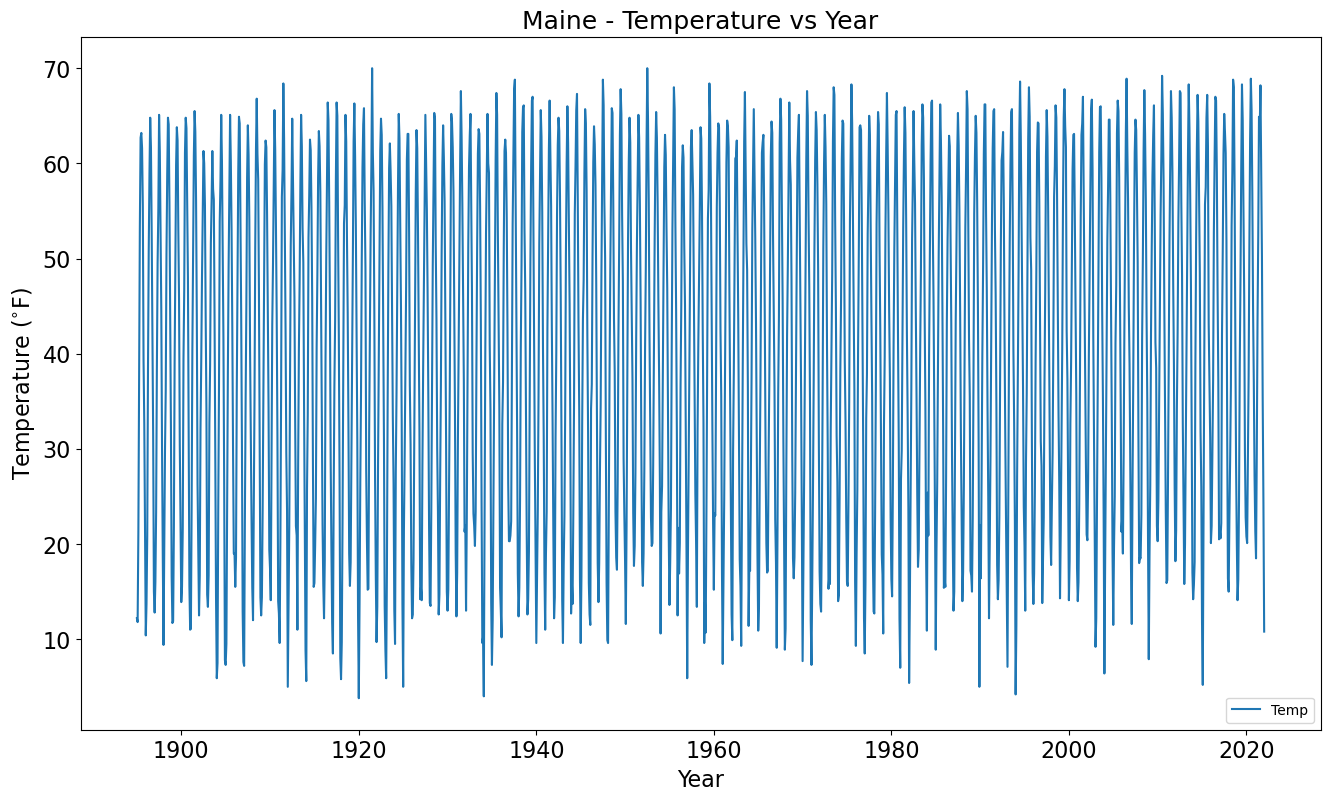

In [31]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(ddate, maine_data['Temp (F)'], label='Temp')
ax.set_ylabel(r'Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Temperature vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
plt.rcParams["figure.figsize"] = (16,9)
ax.legend(loc='lower right')
plt.show()

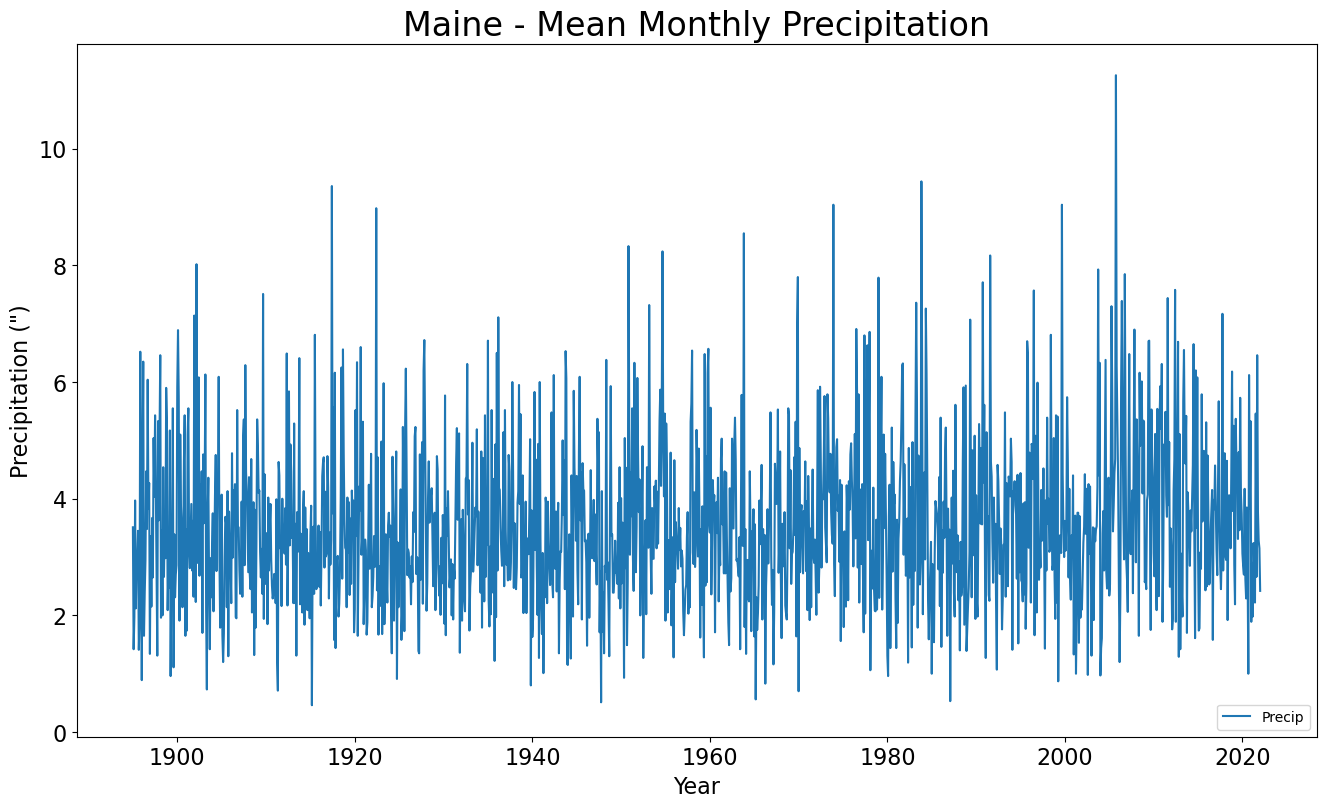

In [32]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(ddate, maine_data['Precip (inches)'], label='Precip')
ax.set_ylabel(r'Precipitation (")', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Mean Monthly Precipitation', color=txt, fontsize = 24)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
plt.rcParams["figure.figsize"] = (16,9)
ax.legend(loc='lower right')
plt.show()

The plots we have produced look pretty nice! However, alone, they are not telling us a lot of information. We need to do some statistics and data analysis to learn what we can from the data. 

For instance:
* What is the rate of increase in temperature over the time span of the data set? 
* Are summers warming faster than winters? 
* What months are receiving the most/least precipitation? 

## Simple Linear Least-Squares Regression
<center>

![Linear Least-Squares Regression](https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg)

</center>
Trying to figure out the best way to fit models to data is something you can literally spend your entire career doing. 

We will have to do with a basic understanding of the mechanics since we don't want to spend our entire semester on this one topic. 

In a sense, fitting straight lines to data is the most important exercise in physics. It is how we test our theoretical understanding, and how we build intuition about the world.

A linear model has two parameters, $a$ and $b$:

$$
y(x) = a + b x.
$$

where $b$ is the slope and $a$ is our y-intercept. 

Linear Least-Squares regression is a method of finding the values of $a$ and $b$ such that we minimize the **Sum of Squared Errors** (SSE) to the fit. 

Put another way, we want to find a stright line that will minimize the sum of residuals to our dataset. 

$$SSE = \sum_{i=1}^{n}(y_{i}-(a + b x_{i}))$$

$$\frac{\partial SSE}{\partial \alpha} = 0$$

$$\frac{\partial SSE}{\partial \beta} = 0$$

The [math for this](https://en.wikipedia.org/wiki/Linear_least_squares#:~:text=Linear%20least%20squares%20(LLS)%20is,and%20generalized%20(correlated)%20residuals.) is generally shown using a bunch of linear algebra. However, to save some time, the result can be expressed as: 

$$b = \frac{S_{xy}}{S_{xx}}$$
$$a = \bar{y}-b\bar{x}$$

where:

$$S_{xy} = \sum_{i=1}^{n}(x_i - \bar{x})(y_{i}-\bar{y})$$
$$S_{xx}=\sum_{i=1}^{n}(x_i - \bar{x})^{2}$$

These are sometimes called the **sum of square** values. We will use them to calculate our Confidence Intervals and Confidence Bands.


## Scipy Linear Regression

The above equations could be implimented and produce the results we are looking for. However, we can make our lives a little bit easiery by utilizng libraries built for Python that will do the calculations for us (as well as spit out a bunch of useful statistics)!

[Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

Importing:

`scipy.stats as ss` 

allows us to utilize [fuctions in the statistics module](https://docs.scipy.org/doc/scipy/reference/stats.html) of scipy. 

In particular, we are interested in:

`ss.linregress`

which will calculate:
* slope
* intercept
* r (Pearson correlation coefficient)
* p (the p-value for a hypothesis test whose null hypothesis is that the slope is zero)
* stderr (the standard error of the slope)
* intercept_stderr (the standard error of the intercept)

In [33]:
# res is an object that contains: 
    # res.slope = slope
    # res.intercept = intercept
    # res.rvalue = r
    # res.pvalue = p
    # res.stderr = slope standard error
    # res.intercept_stderr = intercept standard error
res = ss.linregress(ddate, maine_data['Temp (F)'])

print(f"slope =","{:.5f}".format(res.slope))
print(f"intercept =","{:.3f}".format(res.intercept))
print(f"r-sqrd =","{:.2}".format((res.rvalue)**2))
print(f"p-value null hyp =","{:.3}".format(res.pvalue))
print(f"slope std error =","{:.4}".format(res.stderr))
print(f"intercept std error =","{:.5}".format(res.intercept_stderr))

slope = 0.02698
intercept = -12.463
r-sqrd = 0.0029
p-value null hyp = 0.0358
slope std error = 0.01285
intercept std error = 25.163


To calculate the linear fit to our data, we simply take the slope times our x-values (`ddate`) and add the intercept: 

In [34]:
fit = res.slope*ddate + res.intercept

## Confidence Intervals and Prediction Intervals

Something we are very often interested in is knowing how "well" our regression fits our data. 

This is often reported using the square of the Pearson Correlation Coefficient, the Coefficient of Determination (or r$^2$ value), but we want a bit more than just to report r$^2$, what we really want to do is:

1. Give a Confidence Interval for our slope and intercept (how much variance is in our fit)
2. Plot a Confidence Interval (visually display statistical variance in our fit)
3. Plot a Prediction Interval (visually display where individual values statistically fall)

So, what is the difference between a confidence interval and a prediction interval?

* The prediction interval predicts in what range a future individual observation will fall
* a confidence interval shows the likely range of values associated with some statistical parameter of the data, such as the population mean



We will need to do a few calculations to include these values in our analysis. 

First, let's find SSE, S$_{xy}$, and S$_{xx}$.

In [35]:
# SSE: sum of squared errors
SSE = np.sum((maine_data['Temp (F)']-((res.slope*ddate)+res.intercept))**2)

# S_xy: sum of squares for x*y
S_xy = np.sum((maine_data['Temp (F)']-np.mean(maine_data['Temp (F)'])) * (ddate-np.mean(ddate)))

# S_xx: sum of squares for x*x
S_xx = np.sum((ddate-np.mean(ddate))**2)

Next, we can calculate the slope and intercept confidence intervals. 

For this, we need the *Two-sided inverse Students t-distribution*, [which we will utilize scipy for](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html):

In [36]:
# tinv is our two-sided inverse students t-distribution value
tinv = lambda p, df: abs(ss.t.ppf(p/2, df))

# for 95%, plug in 0.05
# for 68%, plug in 0.32
ts_95 = tinv(0.05, len(ddate)-2)
ts_68 = tinv(0.32, len(ddate)-2)

The confidence intervals for the slope and intercept is calculated from multiplying the two-sided inverse students t-distribution value by the standard error:

In [37]:
# slope 95% CI 
slope_95CI = ts_95*res.stderr
print(f"slope =","{:.5f}".format(res.slope),"+/-","{:.5f}".format(slope_95CI))

# intercept 95% CI
inter_95CI = ts_95*res.intercept_stderr
print(f"intercept =","{:.3f}".format(res.intercept),"+/-","{:.3f}".format(inter_95CI))

slope = 0.02698 +/- 0.02520
intercept = -12.463 +/- 49.359


There are two more calculations we need:

The formula to calculate the Confidence Interval ($CI$): 

$$CI = a + bx_i \pm tS\sqrt{\frac{1}{n}+\frac{(x_i - \bar{x})^2}{S_{xx}}}$$

and the formula to calculate the Prediction Interval ($PI$):

$$PI = a + bx_i \pm tS\sqrt{1+\frac{1}{n}+\frac{(x_i - \bar{x})^2}{S_{xx}}}$$

We have everything we need except the value of $S$, which is the standard deviation calculated from the Sum of Squared Errors ($SSE$):

$$S = \sqrt{\frac{SSE}{n-2}}$$

where $n$ is equal to the length of our dataset: 

`len(ddate)`



In [38]:
# S = standard deviation calculated from SSE
S = np.sqrt(SSE/(len(ddate)-2))

# Confidence Interval using 95% test statistic
CI_95 = ts_95*S*np.sqrt((1/len(ddate))+((ddate - np.mean(ddate))**2)/S_xx)

# Prediction Interval using 68% test statistic
PI_68 = ts_68*S*np.sqrt(1+(1/len(ddate))+((ddate - np.mean(ddate))**2)/S_xx)

Now we can update our plot to include:
* Temperature Data
* Linear Fit
* 68% Prediction Interval
* 95% Confidence Interval

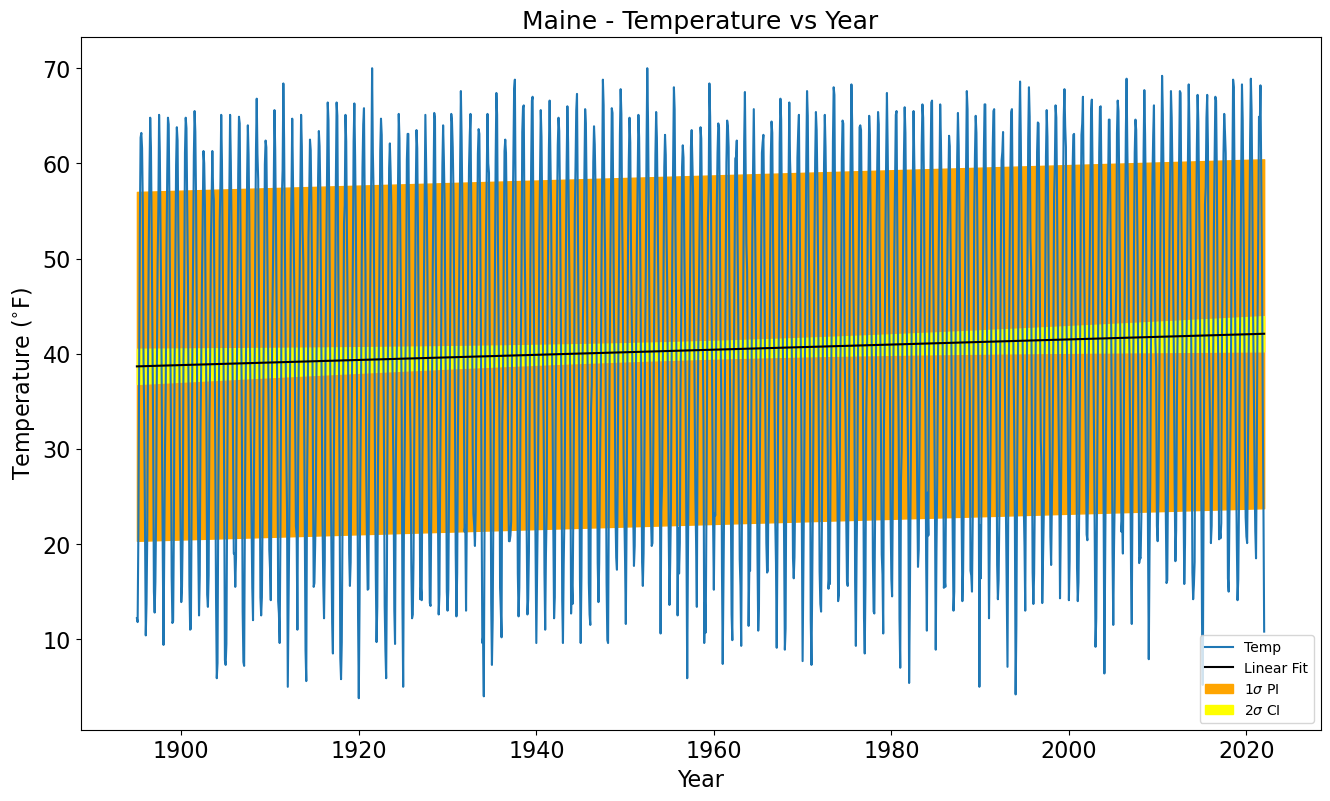

In [39]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(ddate, maine_data['Temp (F)'], label = 'Temp')
p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit') 
p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Temperature vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

# Lab Assignment - P1


1) **Describe what the above plot is showing**

*Your Answer Here!!!*

In all plots, include: 

* a linear fit to the data
* a 1$\sigma$ Prediction Interval
* a 2$\sigma$ Confidence Interval
* plot title and axis labels
* plot legend

2) **Produce a plot of the mean annual summer (JJA) temperature in Maine between 1900 and 2020.**

The following code can be used to filter down our maine_data dataframe to include only the months of interest, then calculate the mean summer temperature.

In [40]:
# filter data to JJA Months
summer_df = maine_data[maine_data['month'] < 9]
summer_df = summer_df[summer_df['month'] >= 6]

# filter data to 1900 - 2020 years
summer_df = summer_df[summer_df['year'] > 1899]
summer_df = summer_df[summer_df['year'] < 2021] 

# arrays to store mean values 
JJA_year = np.zeros(int(len(summer_df)/3))
JJA_temp = np.zeros(int(len(summer_df)/3))
JJA_precip = np.zeros(int(len(summer_df)/3))

# loop to calculate mean temperature and year
for i in range(len(JJA_temp)):
    JJA_year[i] = summer_df['year'].iloc[i*3]
    JJA_temp[i] = np.mean(summer_df['Temp (F)'].iloc[i*3:((i*3)+3)])
    JJA_precip[i] = np.mean(summer_df['Precip (inches)'].iloc[i*3:((i*3)+3)])
    

# dataframe to store mean temperature and year
JJA = pd.DataFrame({'Year':JJA_year, 'Summer T':JJA_temp, 'Summer Precip':JJA_precip})

# print summer data
JJA

,Year,Summer T,Summer Precip
0,1900.0,63.200000,3.173333
1,1901.0,63.200000,3.360000
2,1902.0,58.800000,4.336667
3,1903.0,58.200000,3.536667
4,1904.0,61.166667,3.666667
...,...,...,...
116,2016.0,64.700000,3.780000
117,2017.0,63.166667,3.006667
118,2018.0,65.266667,3.843333
119,2019.0,64.100000,4.266667


In [41]:
# Your Code Here!!!

3) **Produce a plot of the mean annual winter (DJF) temperature in Maine between 1900 and 2020.**

The following code can be used to filter down our maine_data dataframe to include only the months of interest, then calculate the mean winter temperature.

In [42]:
# define a new data frame to manipulate
winter_df = maine_data

# loop to convert month 12 to month 0
for i in range(len(winter_df)):
    if winter_df['month'][i] == 12:
        winter_df['month'][i] = 0

# filter out months greater than 2   
winter_df = winter_df[winter_df['month'] <= 2]

# filter out years besides 1900 up to 2020
winter_df = winter_df[winter_df['year'] > 1898]
winter_df = winter_df[winter_df['year'] < 2021]

# filter out the JF from 1899 and the D from 2020
winter_df = winter_df.drop([48,49,1511])

# arrays to place data in
DJF_year = np.zeros(int(len(winter_df)/3))
DJF_temp = np.zeros(int(len(winter_df)/3))
DJF_precip = np.zeros(int(len(winter_df)/3))

# loop to calc mean values
for i in range(len(DJF_temp)):
    DJF_year[i] = winter_df['year'].iloc[(i)*3 + 1]
    DJF_temp[i] = np.mean(winter_df['Temp (F)'].iloc[i*3:((i*3)+3)])
    DJF_precip[i] = np.mean(winter_df['Precip (inches)'].iloc[i*3:((i*3)+3)])

# dataframe to store mean temp and year 
DJF = pd.DataFrame({'Year':DJF_year, 'Winter T':DJF_temp, 'Winter Precip':DJF_precip})

# print winter data
DJF

/tmp/ipykernel_31/819464541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df['month'][i] = 0


,Year,Winter T,Winter Precip
0,1900.0,17.366667,5.223333
1,1901.0,12.566667,2.286667
2,1902.0,16.066667,4.153333
3,1903.0,14.933333,4.166667
4,1904.0,9.233333,3.003333
...,...,...,...
116,2016.0,24.400000,4.183333
117,2017.0,20.866667,3.836667
118,2018.0,18.033333,3.890000
119,2019.0,16.933333,3.970000


In [43]:
# Your Code Here!!!

4) **Discuss any differences between the Maine seasonal plots and that of the Maine full dataset (the example above).** 

In your discussion, touch on:

* The slope of the best fit line including the 95% CI around the slope. 
* The mean value in 1900 and 2020 as well as the Prediction Interval at those time periods. 


<font color = blue>

***Your Answer Here!!!***

</font>

## **Climate Impacts of ENSO**

<center>

![alt text](ENSO.PNG)

</center>

El Niño and La Niña are the warm and cool phases of a recurring climate pattern across the tropical Pacific—the El Niño-Southern Oscillation, or “ENSO” for short. The pattern shifts back and forth irregularly every two to seven years, bringing predictable shifts in ocean surface temperature and disrupting the wind and rainfall patterns across the tropics. These changes have a cascade of global side effects.

<center>

![alt text](Winter_El_Nino.PNG)
![alt text](Winter_La_Nina.PNG)

</center>

La Niña strengthens the normal atmospheric circulation across the tropical Pacific Ocean. One side effect is a strong high pressure area in the Northeast Pacific. Like a boulder in a river, this high pressure changes the flow of storms as they approach the western U.S., favoring wet winters in the Northwest and dry winters across the South.

Can we see the influence of El Niño and La Niña in our dataset? 

In [44]:
# import data
ENSO_df = pd.read_csv('ENSO Seasonal.csv')

ENSO_df

,Year,DJF Index,DJF El Nino,DJF La Nina,JJA Index,JJA El Nino,JJA La Nina
0,1950,-1.5,0,1,-0.5,0,1
1,1951,-0.8,0,0,0.7,1,0
2,1952,0.5,1,0,-0.1,0,0
3,1953,0.4,0,0,0.7,1,0
4,1954,0.8,1,0,-0.6,0,1
...,...,...,...,...,...,...,...
66,2016,2.5,1,0,-0.4,0,0
67,2017,-0.3,0,0,0.1,0,0
68,2018,-0.9,0,1,0.1,0,0
69,2019,0.7,1,0,0.3,0,0


`ENSO_df` [contains Oceanic Niño Index (ONI) data from NOAA](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php). The columns contain:


1. Year (beginning in 1950)
2. DJF Index 
3. DJF El Nino (1 for TRUE, 0 for FALSE)
4. DJF La Nina (1 for TRUE, 0 for FALSE)
5. JJA Index
6. JJA El Nino (1 for TRUE, 0 for FALSE)
7. JJA La Nina (1 for TRUE, 0 for FALSE)

The ONI Index is an indication of the strength of the El Niño or La Niña. 

To be in El Niño or La Niña, the ONI Index must be at or above 0.5 or below -0.5 for 5 consecutive months. Hence why a positive (+) number does not automatically indicate we are in El Niño, even if it is above 0.5 on the ONI Index.


## **ENSO Data Filtering**

Our goal is to filter our seasonal dataframes (`JJA` and `DJF`) to only contain years where we were in El Niño or La Niña to see if there is a statistically significant difference. 

One way to do this is to define a dataframe tha contains only the years when a given season is experiencing El Niño or La Niña, then filter down our seasonal dataframes to match these years. 

In [45]:
# filter summer data for El Nino
s_el_df = ENSO_df[ENSO_df['JJA El Nino'] > 0]
nino_summer = JJA[JJA['Year'].isin(s_el_df['Year'])]

# filter summer data for La Nina
s_la_df = ENSO_df[ENSO_df['JJA La Nina'] > 0]
nina_summer = JJA[JJA['Year'].isin(s_la_df['Year'])]

# filter summer data for neither
s_norm_df = ENSO_df[(ENSO_df['JJA El Nino'] < 1) & (ENSO_df['JJA La Nina'] < 1)] 
norm_summer = JJA[JJA['Year'].isin(s_norm_df['Year'])]

# filter winter data for El Nino
w_el_df = ENSO_df[ENSO_df['DJF El Nino'] > 0]
nino_winter = DJF[DJF['Year'].isin(w_el_df['Year'])]

# filter winter data for La Nina
w_la_df = ENSO_df[ENSO_df['DJF La Nina'] > 0]
nina_winter = DJF[DJF['Year'].isin(w_la_df['Year'])]

# filter winter data for neither
w_norm_df = ENSO_df[(ENSO_df['DJF El Nino'] < 1) & (ENSO_df['DJF La Nina'] < 1)] 
norm_winter = DJF[DJF['Year'].isin(w_norm_df['Year'])]

s_la_df

,Year,DJF Index,DJF El Nino,DJF La Nina,JJA Index,JJA El Nino,JJA La Nina
0,1950,-1.5,0,1,-0.5,0,1
4,1954,0.8,1,0,-0.6,0,1
5,1955,-0.7,0,1,-0.7,0,1
6,1956,-1.1,0,1,-0.6,0,1
14,1964,1.1,1,0,-0.6,0,1
20,1970,0.5,1,0,-0.6,0,1
21,1971,-1.4,0,1,-0.8,0,1
23,1973,1.8,1,0,-1.1,0,1
24,1974,-1.8,0,1,-0.5,0,1
25,1975,-0.5,0,1,-1.1,0,1


Now we can plot the data and color code each data point to match if it is in Niño or La Niña.

Let's first look at winter:

In [46]:
# JJA and DJF from 1950 through 2020
JJA_50 = JJA[JJA['Year'].isin(ENSO_df['Year'])]
DJF_50 = DJF[DJF['Year'].isin(ENSO_df['Year'])]

# Stat Analysis
res_winter_50 = ss.linregress(DJF_50['Year'], DJF_50['Winter T'])

# linear fit for winter months
fit_DJF_50 = res_winter.slope*DJF_50['Year'] + res_winter.intercept

# SSE: sum of squared errors
SSE_DJF_50 = np.sum((DJF_50['Winter T']-((res_winter.slope*DJF_50['Year'])+res_winter.intercept))**2)

# S_xy: sum of squares for x*y
S_xy_DJF_50 = np.sum((DJF_50['Winter T']-np.mean(DJF_50['Winter T'])) * (DJF_50['Year']-np.mean(DJF_50['Year'])))

# S_xx: sum of squares for x*x
S_xx_DJF_50 = np.sum((DJF_50['Year']-np.mean(DJF_50['Year']))**2)

# tinv is our two-sided inverse students t-distribution value
tinv = lambda p, df: abs(ss.t.ppf(p/2, df))

# for 95%, plug in 0.05
# for 68%, plug in 0.32
ts_95_DJF_50 = tinv(0.05, len(DJF_50['Year'])-2)
ts_68_DJF_50 = tinv(0.32, len(DJF_50['Year'])-2)

# slope 95% CI 
slope_95CI_DJF_50 = ts_95_DJF_50*res_winter_50.stderr
print(f"Winter Slope =","{:.5f}".format(res_winter_50.slope),"+/-","{:.5f}".format(slope_95CI_DJF_50))

# intercept 95% CI
inter_95CI_DJF_50 = ts_95_DJF_50*res_winter_50.intercept_stderr
print(f"Winter Intercept =","{:.3f}".format(res_winter_50.intercept),"+/-","{:.3f}".format(inter_95CI_DJF_50))

# S = standard deviation calculated from SSE
S_DJF_50 = np.sqrt(SSE_DJF_50/(len(DJF_50['Year'])-2))

# Confidence Interval using 95% test statistic
CI_95_DJF_50 = ts_95_DJF_50*S_DJF_50*np.sqrt((1/len(DJF_50['Year']))+((DJF_50['Year'] - np.mean(DJF_50['Year']))**2)/S_xx_DJF_50)

# Prediction Interval using 68% test statistic
PI_68_DJF_50 = ts_68_DJF_50*S_DJF_50*np.sqrt(1+(1/len(DJF_50['Year']))+((DJF_50['Year'] - np.mean(DJF_50['Year']))**2)/S_xx_DJF_50)


## Plot Section
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(DJF_50['Year'], fit_DJF_50, color = 'black', label = 'Linear Fit') 
p2 = ax.fill_between(DJF_50['Year'], fit_DJF_50-PI_68_DJF_50, fit_DJF_50+PI_68_DJF_50, color = 'orange', label = r'1$\sigma$ PI')
p3 = ax.fill_between(DJF_50['Year'], fit_DJF_50-CI_95_DJF_50, fit_DJF_50+CI_95_DJF_50, color = 'yellow', label = r'2$\sigma$ CI')
p4 = ax.scatter(norm_winter['Year'], norm_winter['Winter T'], color = "green", label = 'Normal Year')
p5 = ax.scatter(nina_winter['Year'], nina_winter['Winter T'], color = "blue", label = 'La Nina')
p6 = ax.scatter(nino_winter['Year'], nino_winter['Winter T'], color = "red", label = 'El Nino')
ax.set_ylabel(r'Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Winter Temperature vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

NameError: name 'res_winter' is not defined

The above plot does not help us immediately see winters during La Nina or El Nino are warmer or cooler than average. 

Because we have a non-zero slope, we will want to account for the mean change in temperature over time. We can do this by finding the average residual to the linear fit then comparing La Nina to El Nino years. 

In [314]:
nino_resid = nino_winter['Winter T']-(res_winter_50.slope*nino_winter['Year'] + res_winter_50.intercept)
nina_resid = nina_winter['Winter T']-(res_winter_50.slope*nina_winter['Year'] + res_winter_50.intercept)
norm_resid = norm_winter['Winter T']-(res_winter_50.slope*norm_winter['Year'] + res_winter_50.intercept)
resid = DJF_50['Winter T']-(res_winter_50.slope*DJF_50['Year'] + res_winter_50.intercept)

print(f"El Nino Mean Residual =","{:.3}".format(np.mean(nino_resid)))
print(f"El Nino Residual Stdev =","{:.3}".format(np.std(nino_resid)))
print(f"La Nina Mean Residual =","{:.3}".format(np.mean(nina_resid)))
print(f"La Nina Residual Stdev =","{:.3}".format(np.std(nina_resid)))
print(f"Normal Year Mean Residual =","{:.3}".format(np.mean(norm_resid)))
print(f"Normal Year Residual Stdev =","{:.3}".format(np.std(norm_resid)))
print(f"1950-2020 Dataset Residual Stdev =","{:.3}".format(np.std(resid)))

El Nino Mean Residual = 0.171
El Nino Residual Stdev = 2.88
La Nina Mean Residual = -0.00743
La Nina Residual Stdev = 2.09
Normal Year Mean Residual = -0.171
Normal Year Residual Stdev = 2.92
1950-2020 Dataset Residual Stdev = 2.68


We can also visually represent the above information using [box and whisker plots](https://en.wikipedia.org/wiki/Box_plot):

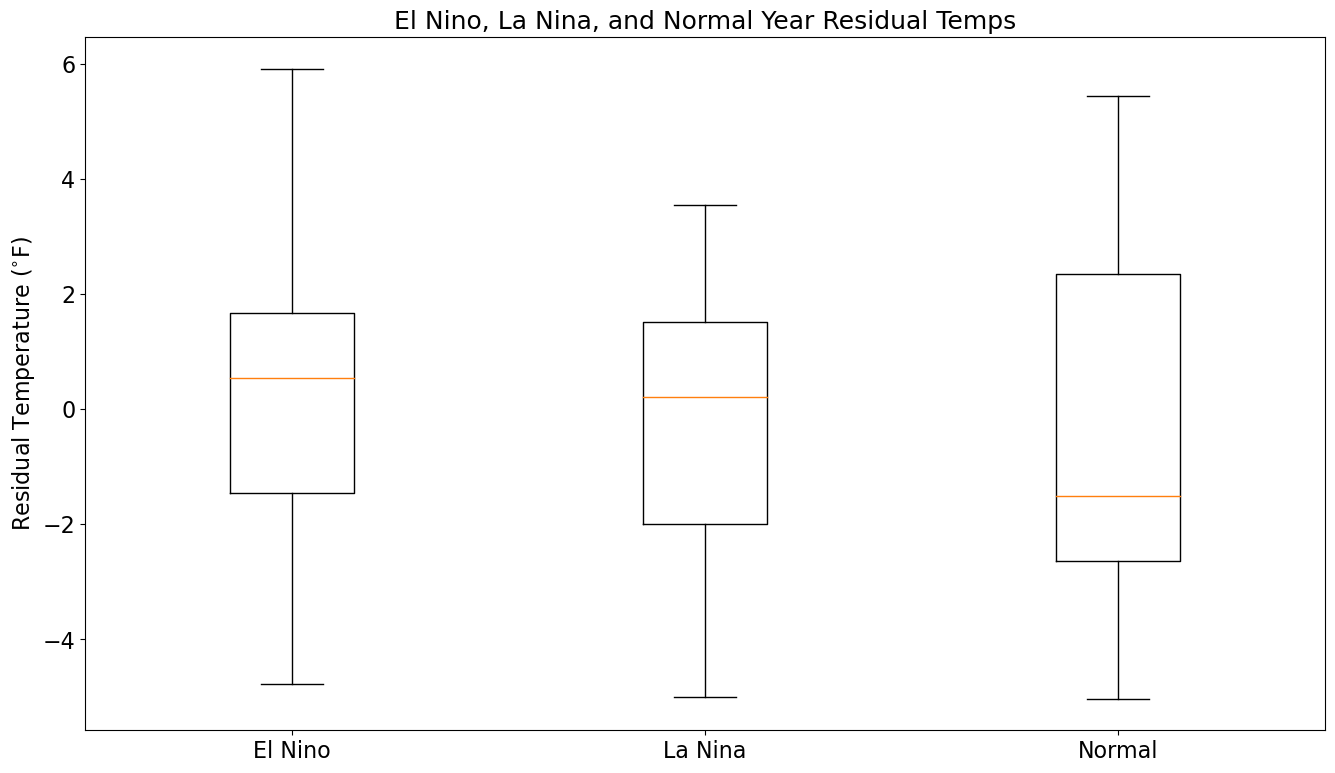

In [315]:
# Create box plot
fig, ax = plt.subplots()
plt.boxplot((nino_resid, nina_resid, norm_resid))
plt.xticks([1, 2, 3], ['El Nino', 'La Nina', 'Normal'], color=txt, fontsize=16)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.set_ylabel(r'Residual Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_title(r'El Nino, La Nina, and Normal Year Residual Temps', color=txt, fontsize = 18)
plt.show()

The results of the box plot suggest that while there is significant overlap between the 25th - 75th percentiles, El Nino years appear to have more significant positive extreams (75th to 95th percentiles) compared to La Nina. 

This suggests we may want to look at strong El Nino years compared to strong La Nina years. 

Strong El Nino Mean Residual = 1.66
Strong El Nino Residual Stdev = 2.32
Strong La Nina Mean Residual = 0.0549
Strong La Nina Residual Stdev = 2.07


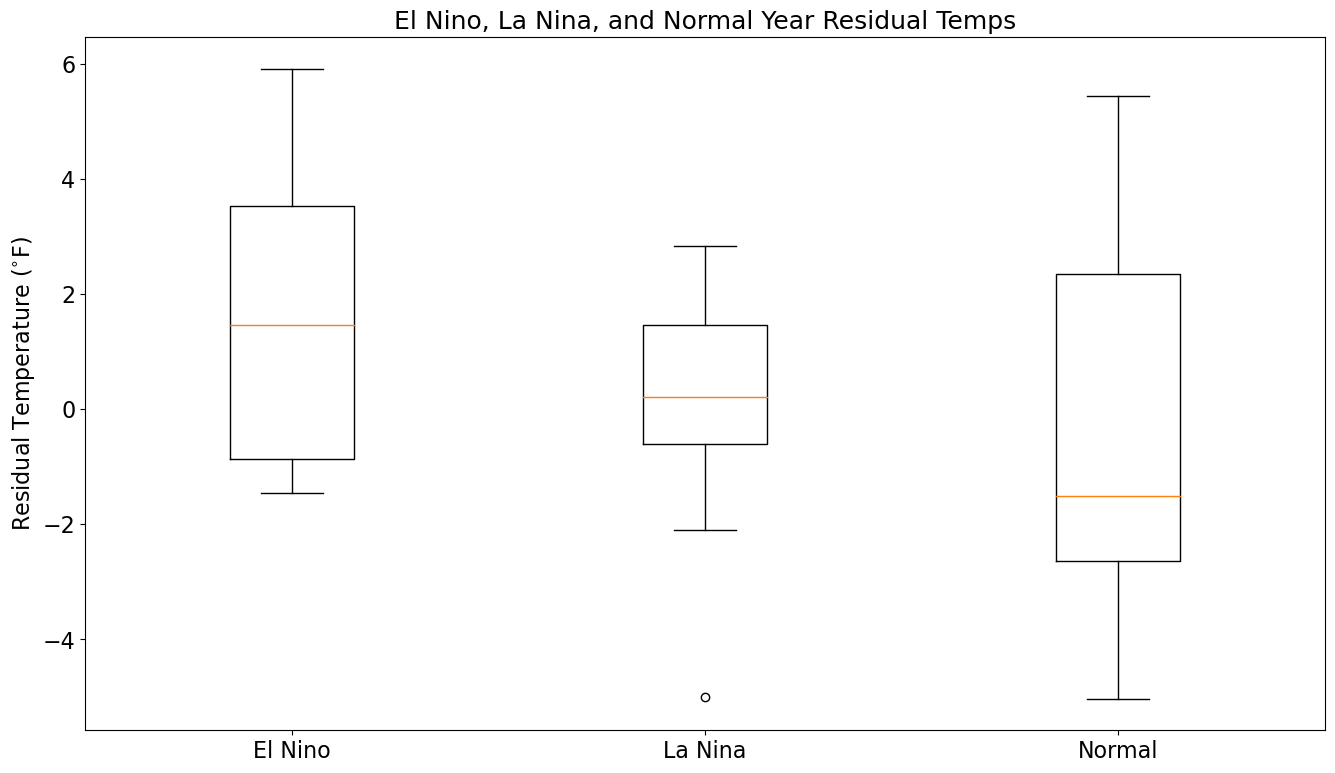

In [316]:
# filter winter data for strong El Nino
strong_w_el_df = w_el_df[w_el_df['DJF Index'] >= 1]
strong_nino_winter = DJF[DJF['Year'].isin(strong_w_el_df['Year'])]
strong_nino_winter

# filter winter data for strong La Nina
strong_w_la_df = w_la_df[w_la_df['DJF Index'] <= -1]
strong_nina_winter = DJF[DJF['Year'].isin(strong_w_la_df['Year'])]

# calculate strong El Nino and strong La Nina residuals 
strong_nino_resid = strong_nino_winter['Winter T']-(res_winter_50.slope*strong_nino_winter['Year'] + res_winter_50.intercept)
strong_nina_resid = strong_nina_winter['Winter T']-(res_winter_50.slope*strong_nina_winter['Year'] + res_winter_50.intercept)

print(f"Strong El Nino Mean Residual =","{:.3}".format(np.mean(strong_nino_resid)))
print(f"Strong El Nino Residual Stdev =","{:.3}".format(np.std(strong_nino_resid)))
print(f"Strong La Nina Mean Residual =","{:.3}".format(np.mean(strong_nina_resid)))
print(f"Strong La Nina Residual Stdev =","{:.3}".format(np.std(strong_nina_resid)))

# Create box plot
fig, ax = plt.subplots()
plt.boxplot((strong_nino_resid, strong_nina_resid, norm_resid))
plt.xticks([1, 2, 3], ['El Nino', 'La Nina', 'Normal'], color=txt, fontsize=16)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.set_ylabel(r'Residual Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_title(r'El Nino, La Nina, and Normal Year Residual Temps', color=txt, fontsize = 18)
plt.show()

# Lab Assignment - P2

5. University of Maine researchers came to the conclusion that strong El Nino years are ~ 1$^\circ$F warmer compared to strong La Nina years. 

[Birkel, S.D. and Mayewski, P.A., 2018. Coastal Maine Climate Futures. Orono, ME: Climate Change Institute, University of Maine. 24pp.]

Do our results here agree or disagree with their result? Why might there be discrepencies between the value?

<font color = blue>

***Your Answer Here!!!***

</font>